# Random Walk on a 1D Lattice

Consider a particle that occupies positions on the 1D Lattice $\mathbb Z$ and moves to the left or right every second.



<div>
    <img src="img/1.1.1.png" style="width: 500px; margin: 20px auto">
</div>






For convenience, we make the following definitions:

* The particle's **state space** is the integer lattice $\mathbb Z$.

* At *time $n$*, or after the $n$-th step, we can describe the position $S^n$

# Simulations of 2D Random Walk


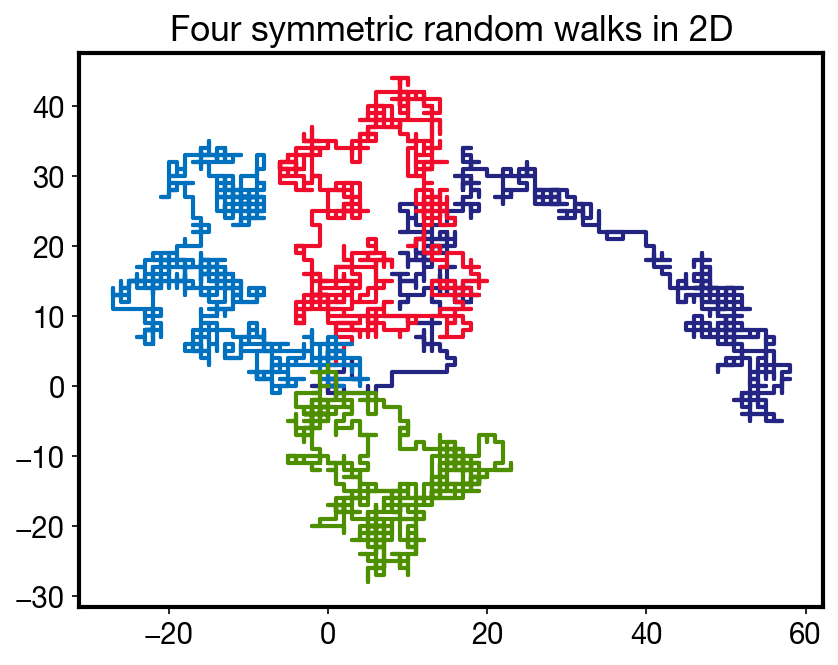

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import utilities as ut
ut.init(use_latex=False)

# Seed random generator
RNG = np.random.default_rng(seed=12345)

# Increments: up, right, down, left
DIRS = np.array([
    [ 0,  1], # up
    [ 1,  0], # right
    [ 0, -1], # down
    [-1,  0]  # left
])

# The function that performs a single random walk and returns the full history
def random_walk_2D(rng, num_steps, step_probs = [0.25, 0.25, 0.25, 0.25]):

    # The history of the entire walk, i.e. particle position
    # at each step
    state = np.zeros((num_steps, 2))

    # take "num_steps" random steps
    for n in range(1, num_steps):
        # Sample a direction according to probabilities
        sampled_dir_idx = rng.choice(4, p=step_probs)

        # Take the step in the sampled direction
        state[n] = state[n-1] + DIRS[sampled_dir_idx]
        
    return state

# Sample and plot four symmetric random walks
for i in range(4):
    symmetric_rw = random_walk_2D(RNG, 1000) # Perform a walk
    plt.plot(symmetric_rw[:, 0], symmetric_rw[:, 1]) # Plot the walk
plt.title('Four symmetric random walks in 2D');

With samples of the random walk, we can calculate sample statistics. This the fundamental reasoning behind the **Monte Carlo method** -- simulate samples of a quantity we are interested in, then characterize that quantity's distribution using the empirical samples obtained via simulation.





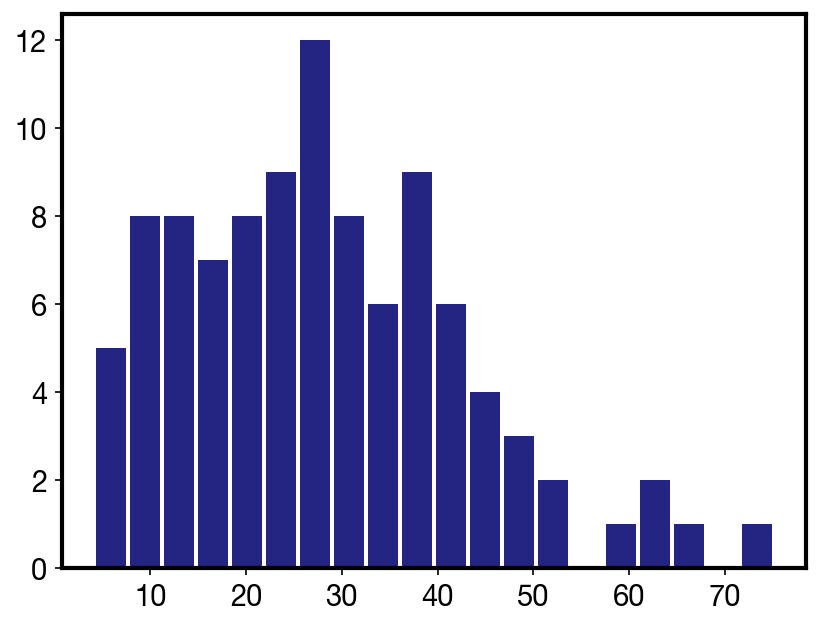

In [12]:
NUM_MC_SAMPLES = 100

displacement_samples = np.zeros(NUM_MC_SAMPLES)

for i in range(NUM_MC_SAMPLES):
    # Perform RW
    symmetric_rw = random_walk_2D(RNG, 1000)
    
    # Calculate net displacement for this random walk
    displacement_samples[i] = np.linalg.norm(symmetric_rw[0] - symmetric_rw[-1])
    
# Plot the histogram of this displacement
_ = plt.hist(displacement_samples, rwidth=0.9, bins=NUM_MC_SAMPLES//5);

You may want to characterize how this distribution changes with respect to the number of Monte Carlo sampled random walks. 

With this distribution, we can calculate summary statistics like expected value and standard deviation:

In [5]:
print('          Expected net displacement after 1000 steps:', np.mean(displacement_samples))
print('Stand deviation of net displacement after 1000 steps:', np.std(displacement_samples))


          Expected net displacement after 1000 steps: 28.344725380658303
Stand deviation of net displacement after 1000 steps: 14.32803346921918


Let's repeat this for different number of steps to see if we can observe a trend.

In [34]:
NUM_MC_SAMPLES = 100
NUM_STEPS = [100*i for i in range(1, 50)]

displacement_samples = np.zeros((len(NUM_STEPS), NUM_MC_SAMPLES))

for i, N in enumerate(NUM_STEPS):
    for j in range(NUM_MC_SAMPLES):
        # Perform RW
        symmetric_rw = random_walk_2D(RNG, N) 

        # Calculate net displacement for this random walk
        displacement_samples[i, j] = np.linalg.norm(symmetric_rw[0] - symmetric_rw[-1])


Text(0, 0.5, 'Net displacement')

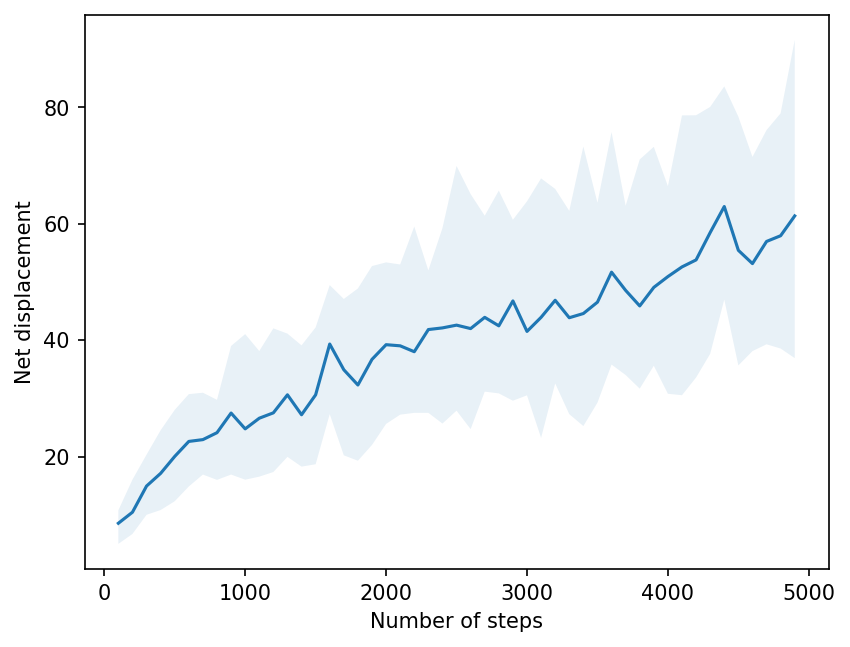

In [36]:

plt.fill_between(NUM_STEPS, 
                 np.percentile(displacement_samples, 25, axis=1),
                 np.percentile(displacement_samples, 75, axis=1), alpha=0.1)
plt.plot(NUM_STEPS, np.median(displacement_samples, axis=1))
plt.xlabel('Number of steps')
plt.ylabel('Net displacement')


* Non-symmetric RW

* Inverse problem: Can we infer step probabilities from measurements of net displacement?